# Text-to-Image Model Editing (TIME) の実装

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/py-img-gen/python-image-generation/blob/main/notebooks/5-6-2_text-to-image-model-editing.ipynb)

- 参考1: https://hf.co/docs/diffusers/main/en/api/pipelines/model_editing
- 参考2: https://github.com/py-img-gen/diffusers-text-to-model-editing

## 準備

In [1]:
!pip install -qq py-img-gen

In [2]:
import warnings

import torch

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)
seed = 19950815

warnings.simplefilter("ignore", FutureWarning)

### パイプラインの設定

In [3]:
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"

custom_pipeline = (
    "py-img-gen/stable-diffusion-text-to-model-editing"
)

### パイプラインの読み込み

In [4]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    model_id,
    custom_pipeline=custom_pipeline,
)
pipe = pipe.to(device)

pipe

cannot get type annotation for Parameter with_augs of <class 'diffusers_modules.local.py-img-gen--stable-diffusion-text-to-model-editing.9e487bd1e24150ac43cf5cc7e65a388e3a2caf00.pipeline.StableDiffusionModelEditingPipeline'>.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

PNDMScheduler for this pipeline is currently not supported.


StableDiffusionModelEditingPipeline {
  "_class_name": "StableDiffusionModelEditingPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

### オリジナルの Stable Diffusion での画像生成

  0%|          | 0/50 [00:00<?, ?it/s]

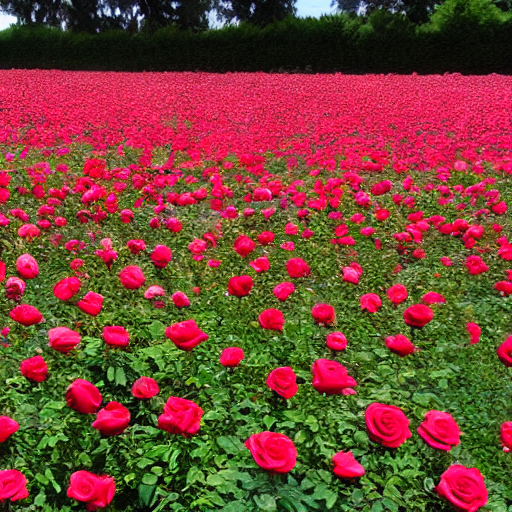

In [5]:
prompt = "A field of roses"

output = pipe(
    prompt=prompt, generator=torch.manual_seed(seed)
)
image_original = output.images[0]
image_original

### TIME を適用した Stable Diffusion での画像生成

  0%|          | 0/50 [00:00<?, ?it/s]

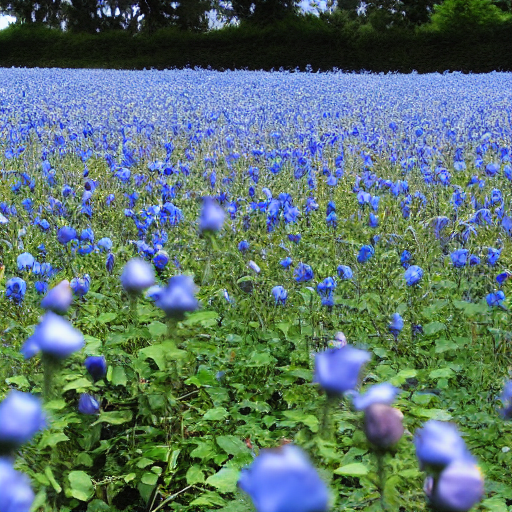

In [6]:
source_prompt = "A pack of roses"
destination_prompt = "A pack of blue roses"

pipe.edit_model(
    source_prompt=source_prompt,
    destination_prompt=destination_prompt,
)

output = pipe(
    prompt=prompt, generator=torch.manual_seed(seed)
)
image_edited = output.images[0]
image_edited

### 生成結果の比較

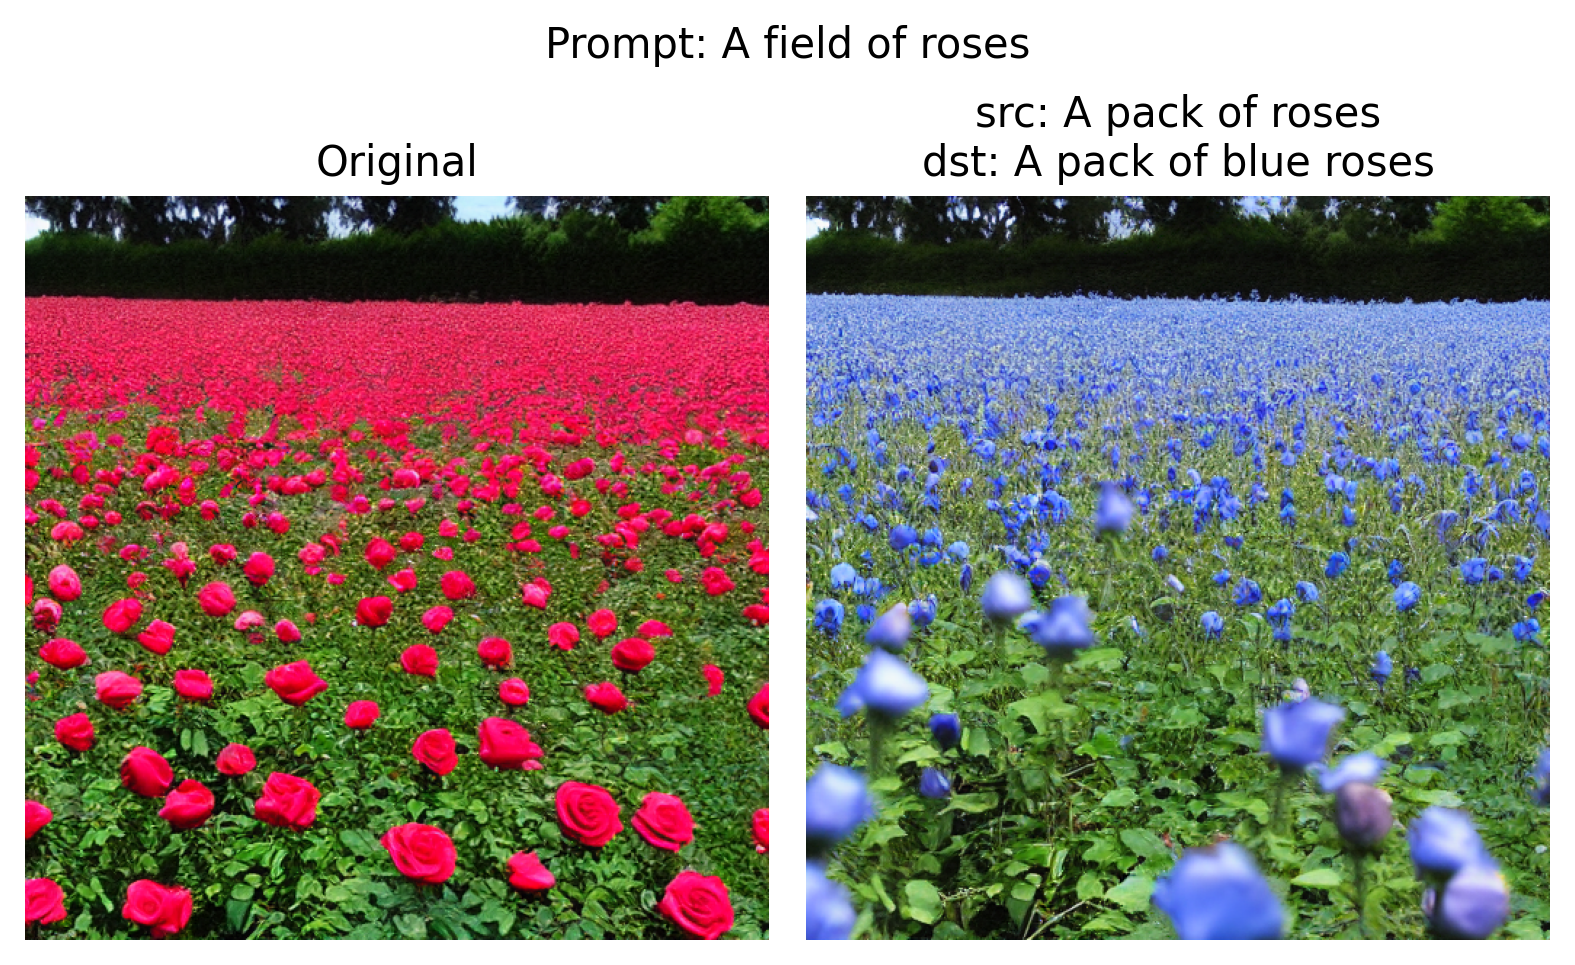

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, dpi=250)
fig.suptitle(f"Prompt: {prompt}", y=0.92)

axes[0].imshow(image_original)
axes[0].set_title("Original")
axes[0].set_axis_off()

axes[1].imshow(image_edited)
axes[1].set_title(
    f"src: {source_prompt}\ndst: {destination_prompt}"
)
axes[1].set_axis_off()

fig.tight_layout()